# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

                   date  revenue
0   2022-03-31 00:00:00    18756
1   2021-12-31 00:00:00    17719
2   2021-09-30 00:00:00    13757
3   2021-06-30 00:00:00    11958
4   2021-03-31 00:00:00    10389
5   2020-12-31 00:00:00    10744
6   2020-09-30 00:00:00     8771
7   2020-06-30 00:00:00     6036
8   2020-03-31 00:00:00     5985
9   2019-12-31 00:00:00     7384
10  2019-09-30 00:00:00     6303
11  2019-06-30 00:00:00     6350
12  2019-03-31 00:00:00     4541
13  2018-12-31 00:00:00     7226
14  2018-09-30 00:00:00     6824
15  2018-06-30 00:00:00     4002
16  2018-03-31 00:00:00     3409
17  2017-12-31 00:00:00     3288
18  2017-09-30 00:00:00     2985
19  2017-06-30 00:00:00     2790
20  2017-03-31 00:00:00     2696
21  2016-12-31 00:00:00     2285
22  2016-09-30 00:00:00     2298
23  2016-06-30 00:00:00     1270
24  2016-03-31 00:00:00     1147
25  2015-12-31 00:00:00     1214
26  2015-09-30 00:00:00      937
27  2015-06-30 00:00:00      955
28  2015-03-31 00:00:00      940
29  2014-1

<AxesSubplot:xlabel='date', ylabel='revenue'>

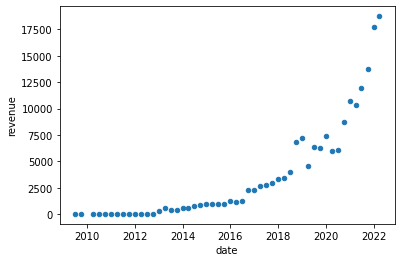

In [3]:
#print(tablas[index_find])


#go inside table and save the values
#df=pd.DataFrame(columns=["date","revenue"])

dataValues = []
#df = pd.DataFrame()
for rowT in tablas[index_find].tbody.find_all("tr"):
    #for each tr (row), take the td (column) value
    colT= rowT.find_all("td")
    if len(colT)>0:
        dateVal=colT[0].text
    revenueVal=colT[1].text.replace("$","").replace(",","")
    #print(dateVal," ",revenueVal)
    dataValues.append({"date":dateVal,"revenue":revenueVal})

#df = df.append({"date":dateVal,"revenue":revenueVal},ignore_index=True)
#deprecated method.

#load data to the dataframe
df = pd.DataFrame.from_records(dataValues)
#print(df.tail(10))

#not null in exploration, if find use dropna
#quito vacios
df=df[df["revenue"] != ""]

#change type
df['date'] = df['date'].astype('datetime64')
df['revenue'] = df['revenue'].astype('int64')

###### STEP DATABASE #########

#create the file where save the database if not exists yet
conn = sqlite3.connect('Tesla.db') 
c = conn.cursor()

#load the dataframe to the database
df.to_sql("Tesla",conn,if_exists='replace',index=False)

conn.commit()

#read from database the data
sel_df = pd.read_sql("select * from Tesla",conn)
print(sel_df)

conn.close()

#can show a exponencial function
df.plot(kind="scatter",x="date",y="revenue")